In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ts-course-data/flu-trends.csv
/kaggle/input/ts-course-data/book_sales.csv
/kaggle/input/ts-course-data/elecdemand.csv
/kaggle/input/ts-course-data/trig.csv
/kaggle/input/ts-course-data/avocados.csv
/kaggle/input/ts-course-data/co2.csv
/kaggle/input/ts-course-data/ar.csv
/kaggle/input/ts-course-data/reserve.csv
/kaggle/input/ts-course-data/us-retail-sales.csv
/kaggle/input/ts-course-data/tunnel.csv


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [3]:
df=pd.read_csv('/kaggle/input/ts-course-data/book_sales.csv')

In [4]:
df

,Date,Paperback,Hardcover
0,2000-04-01,199,139
1,2000-04-02,172,128
2,2000-04-03,111,172
3,2000-04-04,209,139
4,2000-04-05,161,191
5,2000-04-06,119,168
6,2000-04-07,195,170
7,2000-04-08,195,145
8,2000-04-09,131,184
9,2000-04-10,183,135


In [5]:
df.drop(['Paperback'],axis=1,inplace=True)

In [6]:
df

,Date,Hardcover
0,2000-04-01,139
1,2000-04-02,128
2,2000-04-03,172
3,2000-04-04,139
4,2000-04-05,191
5,2000-04-06,168
6,2000-04-07,170
7,2000-04-08,145
8,2000-04-09,184
9,2000-04-10,135


In [7]:
df=df.set_index('Date')

In [8]:
df

,Hardcover
Date,
2000-04-01,139
2000-04-02,128
2000-04-03,172
2000-04-04,139
2000-04-05,191
2000-04-06,168
2000-04-07,170
2000-04-08,145
2000-04-09,184


In [9]:
'''
y(hardcore)=(w*time)+b
'''

df['Time']=np.arange(len(df.index))

In [10]:
df['Time']

Date
2000-04-01     0
2000-04-02     1
2000-04-03     2
2000-04-04     3
2000-04-05     4
2000-04-06     5
2000-04-07     6
2000-04-08     7
2000-04-09     8
2000-04-10     9
2000-04-11    10
2000-04-12    11
2000-04-13    12
2000-04-14    13
2000-04-15    14
2000-04-16    15
2000-04-17    16
2000-04-18    17
2000-04-19    18
2000-04-20    19
2000-04-21    20
2000-04-22    21
2000-04-23    22
2000-04-24    23
2000-04-25    24
2000-04-26    25
2000-04-27    26
2000-04-28    27
2000-04-29    28
2000-04-30    29
Name: Time, dtype: int64

In [11]:
df

,Hardcover,Time
Date,,
2000-04-01,139,0
2000-04-02,128,1
2000-04-03,172,2
2000-04-04,139,3
2000-04-05,191,4
2000-04-06,168,5
2000-04-07,170,6
2000-04-08,145,7
2000-04-09,184,8


In [12]:
#Lag features: Extra features column


df['Lag_1']=df['Hardcover'].shift(1)
df['Lag_2']=df['Hardcover'].shift(2)
df.head()


# generally y(hardcover)=(w*time)+b
# here      y(hardcover)=w1*time+w2*previous_day_sales+w3*previous_two_day_sales


,Hardcover,Time,Lag_1,Lag_2
Date,,,,
2000-04-01,139,0,NaN,NaN
2000-04-02,128,1,139.0,NaN
2000-04-03,172,2,128.0,139.0
2000-04-04,139,3,172.0,128.0
2000-04-05,191,4,139.0,172.0


<Axes: xlabel='Time', ylabel='Hardcover'>

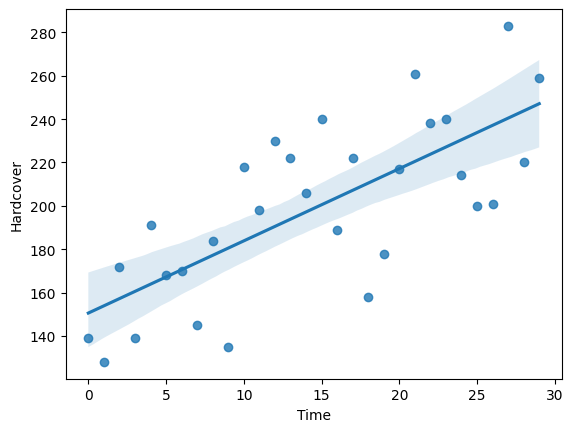

In [13]:
sns.regplot(x='Time',y='Hardcover',data=df)    #regplot is more accurate than lmplot

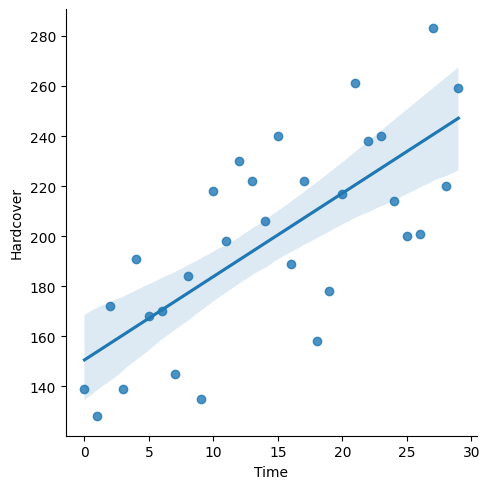

In [14]:
sns.lmplot(x='Time',y='Hardcover',data=df)

In [15]:
df['Lag_1']

Date
2000-04-01      NaN
2000-04-02    139.0
2000-04-03    128.0
2000-04-04    172.0
2000-04-05    139.0
2000-04-06    191.0
2000-04-07    168.0
2000-04-08    170.0
2000-04-09    145.0
2000-04-10    184.0
2000-04-11    135.0
2000-04-12    218.0
2000-04-13    198.0
2000-04-14    230.0
2000-04-15    222.0
2000-04-16    206.0
2000-04-17    240.0
2000-04-18    189.0
2000-04-19    222.0
2000-04-20    158.0
2000-04-21    178.0
2000-04-22    217.0
2000-04-23    261.0
2000-04-24    238.0
2000-04-25    240.0
2000-04-26    214.0
2000-04-27    200.0
2000-04-28    201.0
2000-04-29    283.0
2000-04-30    220.0
Name: Lag_1, dtype: float64

In [16]:
df['Lag_2']

Date
2000-04-01      NaN
2000-04-02      NaN
2000-04-03    139.0
2000-04-04    128.0
2000-04-05    172.0
2000-04-06    139.0
2000-04-07    191.0
2000-04-08    168.0
2000-04-09    170.0
2000-04-10    145.0
2000-04-11    184.0
2000-04-12    135.0
2000-04-13    218.0
2000-04-14    198.0
2000-04-15    230.0
2000-04-16    222.0
2000-04-17    206.0
2000-04-18    240.0
2000-04-19    189.0
2000-04-20    222.0
2000-04-21    158.0
2000-04-22    178.0
2000-04-23    217.0
2000-04-24    261.0
2000-04-25    238.0
2000-04-26    240.0
2000-04-27    214.0
2000-04-28    200.0
2000-04-29    201.0
2000-04-30    283.0
Name: Lag_2, dtype: float64

<Axes: xlabel='Lag_1', ylabel='Hardcover'>

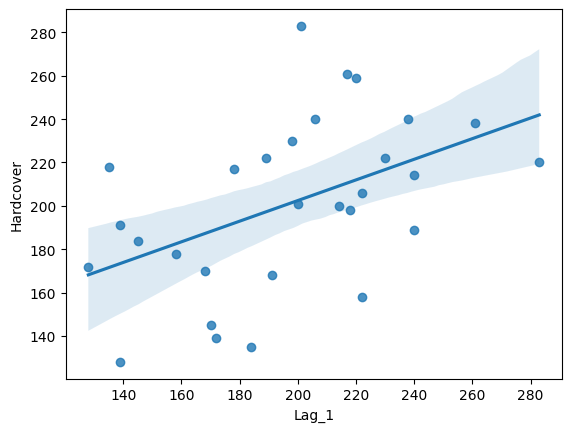

In [17]:
sns.regplot(x='Lag_1',y='Hardcover',data=df)

<Axes: xlabel='Lag_2', ylabel='Hardcover'>

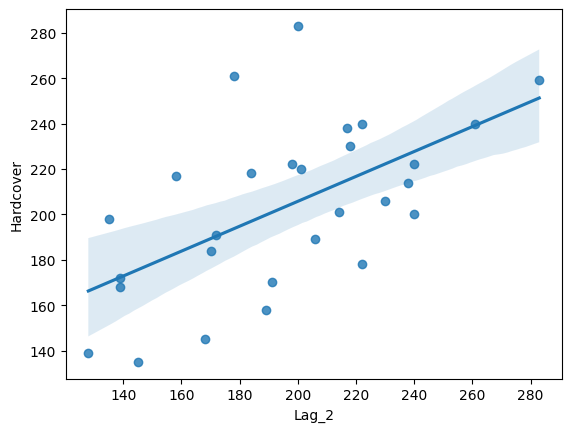

In [18]:
sns.regplot(x='Lag_2',y='Hardcover',data=df)

In [19]:
df.isnull().sum()

Hardcover    0
Time         0
Lag_1        1
Lag_2        2
dtype: int64

In [20]:
df=df.fillna(0)    # u can fill with 0 or mean or median value

In [21]:
df

,Hardcover,Time,Lag_1,Lag_2
Date,,,,
2000-04-01,139,0,0.0,0.0
2000-04-02,128,1,139.0,0.0
2000-04-03,172,2,128.0,139.0
2000-04-04,139,3,172.0,128.0
2000-04-05,191,4,139.0,172.0
2000-04-06,168,5,191.0,139.0
2000-04-07,170,6,168.0,191.0
2000-04-08,145,7,170.0,168.0
2000-04-09,184,8,145.0,170.0


In [22]:
df_train=df.iloc[:20]
df_test=df.iloc[21:]

In [23]:
df_train

,Hardcover,Time,Lag_1,Lag_2
Date,,,,
2000-04-01,139,0,0.0,0.0
2000-04-02,128,1,139.0,0.0
2000-04-03,172,2,128.0,139.0
2000-04-04,139,3,172.0,128.0
2000-04-05,191,4,139.0,172.0
2000-04-06,168,5,191.0,139.0
2000-04-07,170,6,168.0,191.0
2000-04-08,145,7,170.0,168.0
2000-04-09,184,8,145.0,170.0


In [24]:
df_test

,Hardcover,Time,Lag_1,Lag_2
Date,,,,
2000-04-22,261,21,217.0,178.0
2000-04-23,238,22,261.0,217.0
2000-04-24,240,23,238.0,261.0
2000-04-25,214,24,240.0,238.0
2000-04-26,200,25,214.0,240.0
2000-04-27,201,26,200.0,214.0
2000-04-28,283,27,201.0,200.0
2000-04-29,220,28,283.0,201.0
2000-04-30,259,29,220.0,283.0


In [25]:
df_train=df_train.reset_index()

In [26]:
df_train

,Date,Hardcover,Time,Lag_1,Lag_2
0,2000-04-01,139,0,0.0,0.0
1,2000-04-02,128,1,139.0,0.0
2,2000-04-03,172,2,128.0,139.0
3,2000-04-04,139,3,172.0,128.0
4,2000-04-05,191,4,139.0,172.0
5,2000-04-06,168,5,191.0,139.0
6,2000-04-07,170,6,168.0,191.0
7,2000-04-08,145,7,170.0,168.0
8,2000-04-09,184,8,145.0,170.0
9,2000-04-10,135,9,184.0,145.0


In [27]:
x_train=df_train.loc[:,['Time','Lag_1','Lag_2']]
y_train=df_train.loc[:,['Hardcover']]

x_test=df_test.loc[:,['Time','Lag_1','Lag_2']]
y_test=df_test.loc[:,['Hardcover']]

In [28]:
x_train

,Time,Lag_1,Lag_2
0,0,0.0,0.0
1,1,139.0,0.0
2,2,128.0,139.0
3,3,172.0,128.0
4,4,139.0,172.0
5,5,191.0,139.0
6,6,168.0,191.0
7,7,170.0,168.0
8,8,145.0,170.0
9,9,184.0,145.0


In [29]:
y_train

,Hardcover
0,139
1,128
2,172
3,139
4,191
5,168
6,170
7,145
8,184
9,135


In [30]:
x_test

,Time,Lag_1,Lag_2
Date,,,
2000-04-22,21,217.0,178.0
2000-04-23,22,261.0,217.0
2000-04-24,23,238.0,261.0
2000-04-25,24,240.0,238.0
2000-04-26,25,214.0,240.0
2000-04-27,26,200.0,214.0
2000-04-28,27,201.0,200.0
2000-04-29,28,283.0,201.0
2000-04-30,29,220.0,283.0


In [31]:
y_test

,Hardcover
Date,
2000-04-22,261
2000-04-23,238
2000-04-24,240
2000-04-25,214
2000-04-26,200
2000-04-27,201
2000-04-28,283
2000-04-29,220
2000-04-30,259


In [32]:
'''
fit: Mean value,Standard deviation
Transform: (x-mean)/standard deviation
'''

'\nfit: Mean value,Standard deviation\nTransform: (x-mean)/standard deviation\n'

In [33]:
#Normalization

scaler1=StandardScaler()   #(x-u)/sigma
x_train=scaler1.fit_transform(x_train)
x_test=scaler1.transform(x_test)

In [34]:
x_train

array([[-1.64750894, -3.33188516, -2.5722822 ],
       [-1.47408695, -0.65017099, -2.5722822 ],
       [-1.30066495, -0.86239297, -0.40269952],
       [-1.12724296, -0.01350504, -0.57439311],
       [-0.95382097, -0.65017099,  0.11238126],
       [-0.78039897,  0.35306021, -0.40269952],
       [-0.60697698, -0.09067667,  0.40894292],
       [-0.43355498, -0.05209085,  0.04994723],
       [-0.26013299, -0.53441354,  0.08116424],
       [-0.086711  ,  0.21800986, -0.30904847],
       [ 0.086711  , -0.72734262,  0.29968336],
       [ 0.26013299,  0.87396872, -0.46513355],
       [ 0.43355498,  0.48811056,  0.83037265],
       [ 0.60697698,  1.10548361,  0.51820248],
       [ 0.78039897,  0.95114035,  1.01767475],
       [ 0.95382097,  0.64245383,  0.89280669],
       [ 1.12724296,  1.29841269,  0.64307055],
       [ 1.30066495,  0.3144744 ,  1.17375984],
       [ 1.47408695,  0.95114035,  0.37772591],
       [ 1.64750894, -0.28360574,  0.89280669]])

In [35]:
x_test

array([[1.99435293, 0.85467581, 0.20603231],
       [2.16777492, 1.70356375, 0.81476414],
       [2.34119692, 1.25982687, 1.50153852],
       [2.51461891, 1.29841269, 1.14254282],
       [2.68804091, 0.79679709, 1.17375984],
       [2.8614629 , 0.52669638, 0.76793862],
       [3.03488489, 0.54598929, 0.5494195 ],
       [3.20830689, 2.12800772, 0.56502801],
       [3.38172888, 0.91255453, 1.84492571]])

In [36]:
scaler2=StandardScaler()   #(x-u)/sigma
y_train=scaler2.fit_transform(y_train)
y_test=scaler2.transform(y_test)

In [37]:
y_train

array([[-1.27431871],
       [-1.60336815],
       [-0.28717041],
       [-1.27431871],
       [ 0.2811877 ],
       [-0.40682475],
       [-0.34699758],
       [-1.0948372 ],
       [ 0.0717926 ],
       [-1.39397305],
       [ 1.08885449],
       [ 0.49058279],
       [ 1.44781751],
       [ 1.20850883],
       [ 0.72989147],
       [ 1.74695335],
       [ 0.22136053],
       [ 1.20850883],
       [-0.7059606 ],
       [-0.10768891]])

In [38]:
y_test

array([[2.37513863],
       [1.68712618],
       [1.74695335],
       [0.96920015],
       [0.55040996],
       [0.58032355],
       [3.0332375 ],
       [1.14868166],
       [2.31531146]])

In [39]:
# data: Train,Test

lin_reg=LinearRegression()
lin_reg.fit(x_train,y_train)

LinearRegression()

In [40]:
lin_reg.predict(x_test)

array([[0.25551669],
       [0.60146688],
       [1.15357816],
       [0.91557658],
       [1.01458939],
       [0.77989786],
       [0.64270152],
       [0.48669501],
       [1.5452828 ]])

In [41]:
lin_reg.intercept_

array([3.68356662e-16])

In [42]:
lin_reg.coef_

array([[ 0.10584755, -0.11713661,  0.70150719]])

In [44]:
y_pred=lin_reg.predict(x_test)
y_pred

array([[0.25551669],
       [0.60146688],
       [1.15357816],
       [0.91557658],
       [1.01458939],
       [0.77989786],
       [0.64270152],
       [0.48669501],
       [1.5452828 ]])

In [47]:
mean_squared_error(y_pred,y_test) #loss is 0.03

1.4475053477049147

In [48]:
lin_reg.score(x_test,y_test)

-1.19361908571965

In [43]:
df_test

,Hardcover,Time,Lag_1,Lag_2
Date,,,,
2000-04-22,261,21,217.0,178.0
2000-04-23,238,22,261.0,217.0
2000-04-24,240,23,238.0,261.0
2000-04-25,214,24,240.0,238.0
2000-04-26,200,25,214.0,240.0
2000-04-27,201,26,200.0,214.0
2000-04-28,283,27,201.0,200.0
2000-04-29,220,28,283.0,201.0
2000-04-30,259,29,220.0,283.0
